<center>
<h1><u>Market Segmentation Analysis</u></h1>
</center>

### **By** <u>**V. Adhiban Siddarth**</u>

## Content
4. [Exploring Data](#4)
5. [Extracting Segments](#5)
6. [Profiling Segments](#6)
7. [Describing Segments](#7)
8. [Selecting (the) Target Segment(s)](#8)
9. [Conclusion](#9)

<div id="4">

---

## Step 4: Exploring Data

In [1]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
warnings.filterwarnings("ignore")

[McDonalds dataset](https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv)

Download Dataset or simply use `pd.read_csv(url)`

In [3]:
if not os.path.exists('mcdonalds.csv'):
    data = requests.get(
        'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
    data = data.text
    with open('mcdonalds.csv', 'w') as f:
        f.write(data)
    print('mcdonalds.csv [Downloaded now]')
else:
    print('mcdonalds.csv [Already downloaded]')

mcdonalds.csv [Already downloaded]


This code snippet is designed to facilitate the download of a CSV file named 'mcdonalds.csv' from a given URL if it does not already exist in the current working directory. The script begins by checking whether the file 'mcdonalds.csv' is present using the `os.path.exists()` function. If the file is not found, it proceeds to download the data. 

To do this, the script imports the required libraries: `os` for filesystem operations and `requests` for making HTTP requests. The URL from which to retrieve the CSV data is set as 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'. The data is fetched from this URL using the `requests.get()` method, and the text content of the response is stored in the 'data' variable.

Subsequently, the code opens a local file named 'mcdonalds.csv' in write mode using a `with` statement. The downloaded data is then written into this file using the `write()` method. This effectively saves the CSV content locally.

Once the file is written, a message is printed to the console, indicating that the download of 'mcdonalds.csv' has been successful. On the other hand, if the file already exists in the directory, the script prints a message stating that the CSV file has already been downloaded.

In summary, this code automates the process of downloading the 'mcdonalds.csv' dataset from a given URL if the file is not already present locally. This can be particularly useful for ensuring that the data is available for analysis or other tasks while avoiding redundant downloads.

In [4]:
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

The code reads a CSV file named 'mcdonalds.csv' into a Pandas DataFrame called 'df'. The output shows the column names present in the DataFrame.

In [5]:
df.shape

(1453, 15)

In [6]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


- **yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting:** These columns seem to represent various attributes or qualities of McDonald's food items, possibly indicating whether respondents perceive them to be yummy, convenient, spicy, etc. The values in these columns are binary indicators (Yes/No) representing respondents' opinions.

- **Like:** This column appears to contain a scale or sentiment rating related to respondents' liking of McDonald's food items. It has values such as -3, +2, and +1, indicating differing levels of liking.

- **Age:** This column likely represents the age of the respondents who provided these opinions. The values are numeric and represent the ages of the respondents.

- **VisitFrequency:** This column could be indicating how often respondents visit McDonald's. The values are categorical, indicating visit frequency, such as "Every three months".

- **Gender:** This column likely represents the gender of the respondents. The values are categorical, indicating whether the respondents are male or female.

In [7]:
df = df.replace({"Yes": 1, "No": 0})

This is used to modify the values within the DataFrame 'df' by replacing specific values. In this case, it replaces the strings "Yes" with the numeric value 1 and the strings "No" with the numeric value 0 across the entire DataFrame.

Here's a breakdown of what this line of code does:

df: This refers to the Pandas DataFrame named 'df', which likely contains data related to respondents' opinions about certain attributes of McDonald's food items.

.replace({"Yes": 1, "No": 0}): This method call instructs Pandas to perform a replacement operation on the DataFrame. The argument {"Yes": 1, "No": 0} is a dictionary where keys represent the values to be replaced ("Yes" and "No"), and the corresponding values are the replacements (1 and 0).

So, when this line of code is executed, all occurrences of "Yes" within the DataFrame are replaced with the value 1, and all occurrences of "No" are replaced with the value 0. This replacement is performed across all columns in the DataFrame, wherever these values are found.

The purpose of this operation might be to convert the categorical responses ("Yes" and "No") into a numerical representation (1 and 0), which can be useful for various analytical and computational tasks. For example, it might make it easier to perform calculations or create visualizations based on these binary attributes.

In [8]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

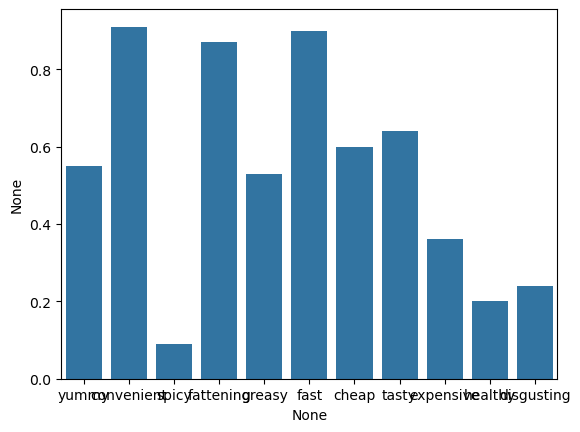

In [9]:
sns.barplot(x=temp.index, y=temp);

1. `df1 = df.iloc[:, :11]`: This line of code creates a new DataFrame 'df1' by selecting the first 11 columns of the original DataFrame 'df'. The `iloc` function is used for integer-location based indexing, and the slicing `[:, :11]` selects all rows and the first 11 columns of the DataFrame.

2. `df1.mean().round(2)`: This line calculates the mean (average) value of each column in the DataFrame 'df1'. The `mean()` function computes the mean along each column. The `.round(2)` method is used to round the calculated mean values to two decimal places.

3. The output displayed is a Series object that represents the calculated mean values for each column. Each row in the output shows the name of the column and its corresponding mean value. For example, 'yummy' has a mean value of 0.55, 'convenient' has a mean value of 0.91, and so on.

This code and its output provide insights into the average responses of the survey participants to various attributes of McDonald's food items. For instance, the 'convenient' attribute has a high average value of 0.91, suggesting that respondents generally find McDonald's food to be convenient. On the other hand, 'spicy' has a low average value of 0.09, indicating that respondents tend to perceive McDonald's food as not very spicy on average.

In [10]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


1. `scaler = StandardScaler()`: An instance of `StandardScaler` is created. This scaler is used to standardize the features by removing the mean and scaling to unit variance. Standardization is important for many machine learning algorithms that are sensitive to feature scales.

3. `df2 = scaler.fit_transform(df1)`: The scaler is applied to the data in 'df1' using the `fit_transform` method. This scales the features in 'df1' and stores the scaled data in 'df2'.

4. `pca = PCA()`: An instance of `PCA` (Principal Component Analysis) is created. PCA is a dimensionality reduction technique that transforms data into a new coordinate system to capture maximum variance along orthogonal axes.

5. `df2 = pca.fit_transform(df2)`: PCA is applied to the standardized data in 'df2'. This step reduces the dimensionality of the data while retaining the most important information (variance).

6. `pca_df = pd.DataFrame(df2, columns=df1.columns)`: The PCA-transformed data is stored in a new DataFrame named 'pca_df'. The columns of 'pca_df' retain the same column names as the original 'df1' DataFrame.

7. `pca_df.head()`: This line displays the first few rows of the 'pca_df' DataFrame, showing how the data has been transformed by PCA.

In [11]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-4.401159e-17,-1.467053e-17,1.222544e-17,-1.344799e-17,-1.956071e-17,-2.689597e-17,1.711562e-17,2.322834e-17,7.946538e-18,1.039163e-16,1.467053e-17
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-4.566454e+00,-4.102422e+00,-4.199369e+00,-1.481192e+00,-3.606405e+00,-4.201958e+00,-3.693790e+00,-2.829568e+00,-2.462379e+00,-1.849848e+00,-1.788916e+00
25%,-1.079822e+00,-9.227436e-01,-6.062742e-01,-7.415504e-01,-4.441573e-01,-4.651667e-01,-6.711110e-01,-5.707646e-01,-4.033967e-01,-1.917207e-01,-6.189398e-02
50%,2.275531e-01,4.300592e-02,1.739581e-01,-1.634068e-01,2.368836e-02,6.102541e-02,-3.398968e-02,-2.066852e-01,-9.809878e-02,-1.212930e-01,5.602312e-02
75%,1.082756e+00,8.196100e-01,8.166025e-01,1.380806e-01,6.594894e-01,6.525637e-01,5.180840e-01,4.690456e-01,4.512112e-01,-2.327974e-02,1.920805e-01
max,2.883694e+00,2.229399e+00,1.852180e+00,4.202991e+00,2.808926e+00,2.775970e+00,2.791864e+00,2.037274e+00,2.291970e+00,1.596087e+00,1.834070e+00


- **count:** The count represents the number of non-missing values for each attribute. It indicates the total number of data points available for analysis in each column.

- **mean:** The mean is the average value of each attribute. In this context, since the data has been standardized, the mean for each attribute should be very close to zero (approximately 0), indicating that the data has been centered.

- **std:** The standard deviation is a measure of how much the values of each attribute vary around the mean. Smaller standard deviations indicate less variability.

- **min:** The minimum value in each attribute column after standardization. It represents the lowest standardized value in each column.

- **25%, 50%, 75%:** These percentiles represent the values below which a given percentage of observations fall. The 25th percentile (Q1) is the value below which 25% of the observations fall, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the observations fall.

- **max:** The maximum value in each attribute column after standardization. It represents the highest standardized value in each column.

In [12]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.406955,0.308827,0.023320,-0.177861,-0.267796,0.213039,0.289134,0.426115,-0.290944,0.266839,-0.410744
convenient,-0.282615,0.045682,-0.069982,0.205590,0.136300,0.282441,0.575032,-0.242199,-0.567528,-0.201031,0.143888
spicy,0.259588,0.317151,-0.020170,0.608077,0.389568,0.211395,-0.125157,0.269648,0.183298,-0.367814,-0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,-0.346857,0.437148,0.185551,-0.086934,-0.343713,0.568939,-0.256981,-0.286099,0.207362,-0.051787,-0.105843
fast,0.124916,-0.188966,-0.438661,-0.107520,0.278329,0.572734,-0.020657,0.053053,0.171160,0.446166,0.328041
cheap,-0.159878,0.661814,-0.214188,0.023851,0.307300,-0.392436,0.008895,-0.197364,-0.015198,0.449446,0.017070
tasty,-0.016587,-0.150033,0.027835,0.720478,-0.487275,-0.055976,0.064667,-0.059289,0.061727,0.446110,0.079122
expensive,0.195341,0.336539,-0.025239,-0.105052,-0.346137,-0.099235,0.062027,0.213587,0.009675,-0.219269,0.780777
healthy,-0.691446,-0.028831,-0.058187,0.020311,0.015160,-0.017917,-0.060323,0.713426,-0.029581,0.054544,0.016028


- **PC1, PC2, ..., PC11:** These columns represent the principal components obtained from PCA. The PC1 column corresponds to the first principal component, PC2 corresponds to the second principal component, and so on up to PC11.

- **Attributes (yummy, convenient, spicy, ...):** Each row represents an attribute from the original data. For example, 'yummy' represents the attribute related to how respondents perceive the food as yummy.

- **Values:** The values in the table are the weights of each original attribute in the corresponding principal component. These values indicate the strength and direction of the influence of each attribute on each principal component.

For instance, in the first row, the values for PC1 are mostly negative, suggesting that the 'yummy' attribute has a negative influence on the first principal component. This information can be used to understand how each attribute contributes to the overall variance captured by each principal component.

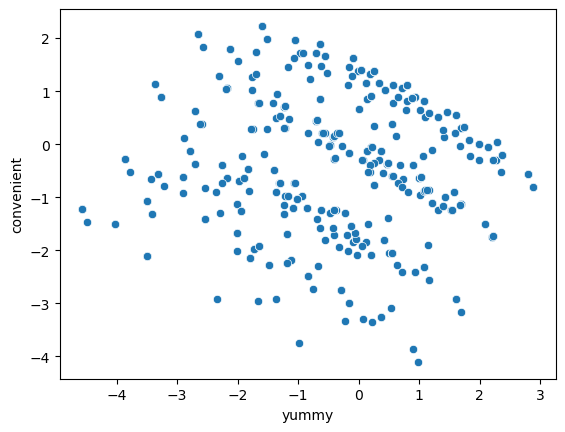

In [13]:
sns.scatterplot(data=pca_df, x='yummy', y='convenient');

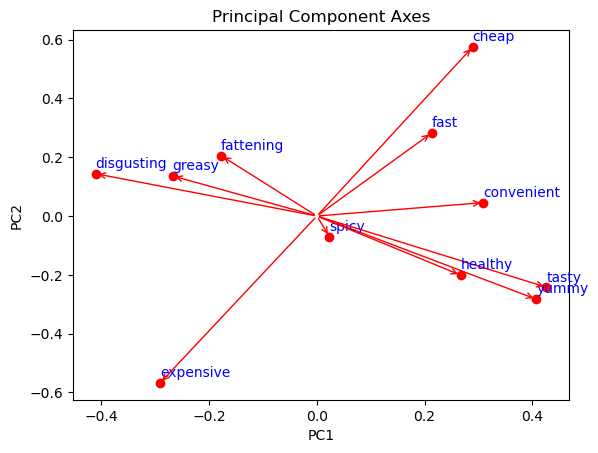

In [14]:
# plt.scatter(x=pca_df['yummy'], y=pca_df['convenient'])

scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

- The subsequent part of the code involves a loop that iterates through each column (attribute) in the PCA-transformed DataFrame and adds text annotations at specific positions on the plot.

- In the loop, `pca.components_[0, :][i]` represents the weight of the current attribute on the first principal component, and `pca.components_[1, :][i]` represents the weight on the second principal component. These values determine the position of the annotations.

- The `plt.text()` function adds blue text labels for each attribute's name close to its corresponding position on the plot.

- The `plt.annotate()` function adds red arrows pointing from the origin (0, 0) to each attribute's position on the plot, visually indicating the influence of attributes on the principal components.

- The `plt.scatter()` function is used to plot the points representing the attributes' weights on the first two principal components. These points are shown in red.

- Finally, axis labels, a title, and the plot are displayed using `plt.xlabel()`, `plt.ylabel()`, `plt.title()`, and `plt.show()`.

This code generates a scatter plot that illustrates how each original attribute contributes to the first two principal components obtained through PCA. The annotations and arrows provide insights into the direction and strength of each attribute's influence on these components.

<div id="5">

## Step 5: Extracting Segments

[Customer Segmentation Using K Means Clustering](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

In [15]:
np.random.seed(0)

In [16]:
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

1. `k_range = range(2, 9)`: This creates a range of values for the number of clusters, 'k', that will be tested. The range starts from 2 and goes up to (but does not include) 9. These values of 'k' will be used to test different cluster numbers.

2. `inertias = []`, `k_result = []`, `silhouette_scores = []`: These empty lists are initialized to store the inertia, cluster labels, and silhouette scores for different values of 'k', respectively. These lists will be populated as the code iterates through the range of 'k' values.

3. Loop (`for k in k_range:`): This loop iterates over each 'k' value in the specified range.

4. Inside the loop:
   - `model = KMeans(n_clusters=k, n_init=10, random_state=0)`: A KMeans clustering model is instantiated with the current value of 'k'. `n_init` specifies the number of times the algorithm will be run with different centroid seeds, and `random_state` ensures reproducibility.
   - `model.fit(pca_df)`: The KMeans model is fitted to the PCA-transformed data, `pca_df`.
   - `labels = model.predict(pca_df)`: The cluster labels for each data point are predicted using the fitted KMeans model.
   - `silhouette_score_ = silhouette_score(pca_df, labels)`: The silhouette score is calculated for the current clustering solution. The silhouette score measures the quality of the clusters; higher values indicate better-defined clusters.
   - `silhouette_scores.append(silhouette_score_)`, `inertias.append(model.inertia_)`, `k_result.append(labels)`: The calculated silhouette score, inertia (within-cluster sum of squared distances), and cluster labels are stored in the respective lists.

5. After the loop:
   - The `inertias` list holds the within-cluster sum of squared distances for each 'k'.
   - The `silhouette_scores` list holds the silhouette scores for each 'k'.
   - The `k_result` list holds the cluster labels for each 'k' value.

This code snippet iterates through different values of 'k', performs K-means clustering on the PCA-transformed data, and collects metrics like inertia and silhouette scores for evaluating the clustering quality. These metrics help to choose an appropriate number of clusters that best represents the data's underlying structure.

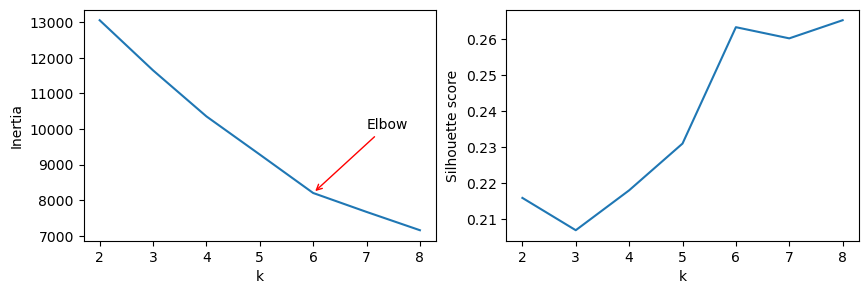

In [17]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
axs[0].plot(range(2, 9), inertias)
axs[0].annotate(
    'Elbow', xytext=(7, 10000), xy=(6, inertias[4]), 
    arrowprops=dict(arrowstyle="->", color='red'))
axs[1].plot(range(2, 9), silhouette_scores)
axs[0].set(xlabel='k', ylabel='Inertia')
axs[1].set(xlabel='k', ylabel='Silhouette score');

- [Clustering Performance Evaluation in Scikit Learn](https://www.geeksforgeeks.org/clustering-performance-evaluation-in-scikit-learn/)
- [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

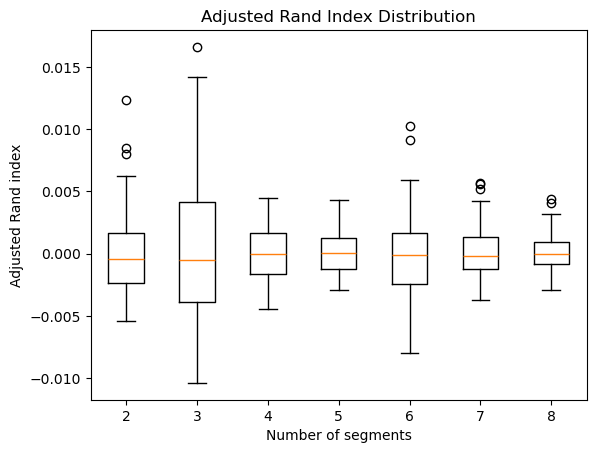

In [18]:
n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

1. `n_boot = 100`: Specifies the number of bootstrapping iterations to be performed for each set of cluster labels.

2. `ARI_scores = []`: Initializes an empty list to store the ARI scores obtained through bootstrapping for each set of cluster labels.

3. Loop (`for labels in k_result:`): Iterates through the list of cluster labels generated for different 'k' values during the K-means clustering.

4. Inside the loop:
   - `ari_boot = []`: Initializes an empty list to store ARI scores obtained through bootstrapping for the current set of cluster labels.
   - Loop (`for _ in range(n_boot):`): Performs bootstrapping by randomly sampling cluster labels with replacement.
     - `random_sample = np.random.choice(labels, size=len(labels), replace=True)`: Generates a random sample of cluster labels with the same length as the original labels.
     - `ari = adjusted_rand_score(labels, random_sample)`: Computes the Adjusted Rand Index between the original cluster labels and the bootstrapped sample.
     - `ari_boot.append(ari)`: Appends the calculated ARI to the list of ARI scores obtained through bootstrapping.

5. `ARI_scores.append(ari_boot)`: Appends the list of bootstrapped ARI scores for the current 'k' value to the main list of ARI scores.

6. After the loops:
   - `plt.boxplot(ARI_scores, labels=range(2, 9))`: Creates a boxplot to visualize the distribution of ARI scores across different 'k' values.
   - `plt.xlabel('Number of segments')`, `plt.ylabel('Adjusted Rand index')`, `plt.title('Adjusted Rand Index Distribution')`: Sets the axis labels and title for the plot.
   - `plt.show()`: Displays the boxplot.

This code assesses the stability of K-means clustering results by computing the Adjusted Rand Index for the original cluster labels and bootstrapped samples of cluster labels. The resulting boxplot visualizes how stable the clustering solutions are for different values of 'k'.

In [19]:
gmm = GaussianMixture(
    n_components=4, 
    covariance_type='full', 
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(
    labels, 
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[111  16   4  47]
 [196   7  26 131]
 [372   6   5 168]
 [  0 105  26 233]]


1. GMM Clustering:
   - A Gaussian Mixture Model with 4 components is created using `GaussianMixture`.
   - GMM is fitted to the PCA-transformed data.
   - Cluster assignments are predicted using `gmm.predict(pca_df)` and stored in `cluster_assignments_gmm`.

2. K-means Clustering:
   - A K-means model with 4 clusters is created using `KMeans`.
   - K-means is fitted to the PCA-transformed data.
   - Cluster assignments are predicted using `model.predict(pca_df)` and stored in `labels`.

3. Confusion Matrix:
   - `conf_matrix = confusion_matrix(labels, cluster_assignments_gmm)` calculates the confusion matrix between the K-means cluster assignments and GMM cluster assignments.

4. Display:
   - The resulting confusion matrix is printed, showing the counts of instances assigned to each combination of clusters from K-means and GMM.

In this matrix, each row represents the predicted cluster assignments from K-means, while each column represents the predicted cluster assignments from GMM. The values indicate the number of instances falling into each combination of clusters, providing insights into the agreement between the two clustering methods.

<div id="6">

## Step 6: Profiling Segments

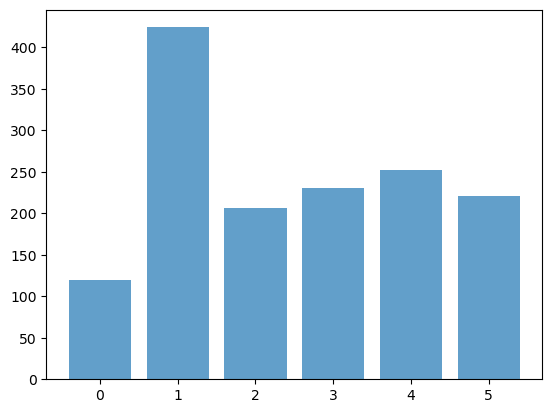

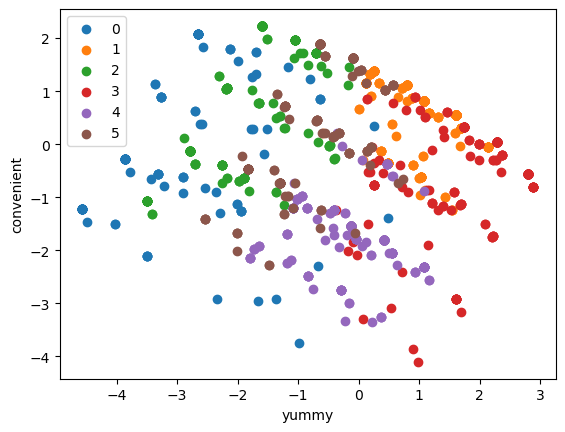

In [20]:
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

first performs K-means clustering with 6 clusters on the PCA-transformed data and visualizes the distribution of instances within each cluster using a bar chart. Subsequently, it generates scatter plots to show the distribution of instances in a 2D space defined by the 'yummy' and 'convenient' attributes, using different colors to represent each of the 6 clusters. In summary, the code clusters instances using K-means, provides an overview of cluster sizes with a bar chart, and then displays how instances are distributed across clusters in a 2D attribute space.

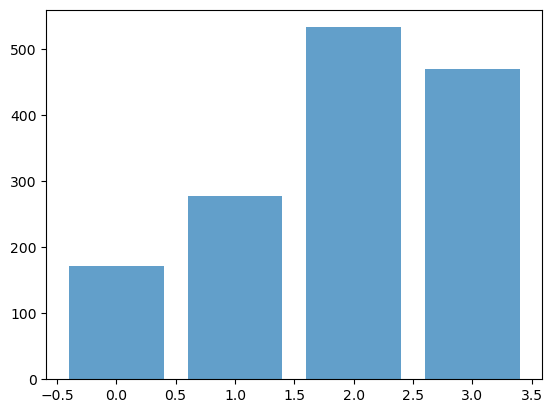

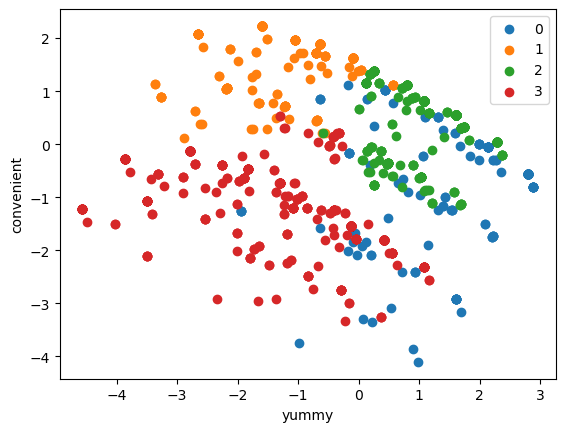

In [21]:
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l4 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

<div id="7">

## Step 7: Describing Segments

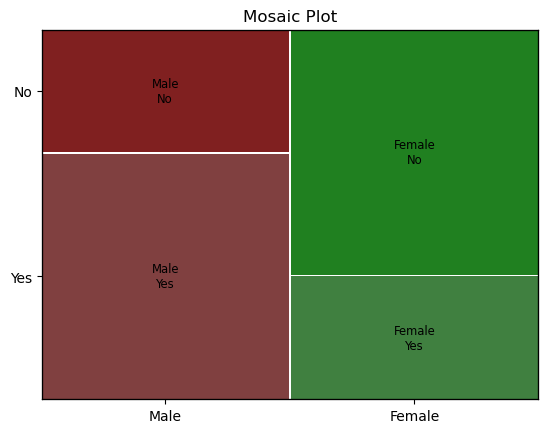

In [22]:
## Example code

# Create a sample data frame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()

In [23]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [24]:
df2 = df
df2['segments'] = l4
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [25]:
df2.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'segments'],
      dtype='object')

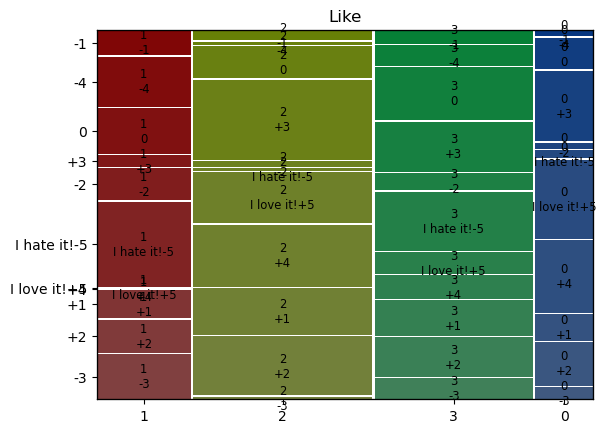

In [26]:
mosaic(df2, ['segments', 'Like'], title='Like');
plt.show()

<div id="8">

## Step 8: Selecting (the) Target Segment(s)

In [27]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3


In [28]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [29]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)

In [30]:
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [31]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3), 
    'Once a week':1, 
    'Once a month':1/4, 
    'Once a year':1/52,
    'More than once a week':2, 
    'Never':0
})

In [32]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.083333,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.083333,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.083333,Female,3


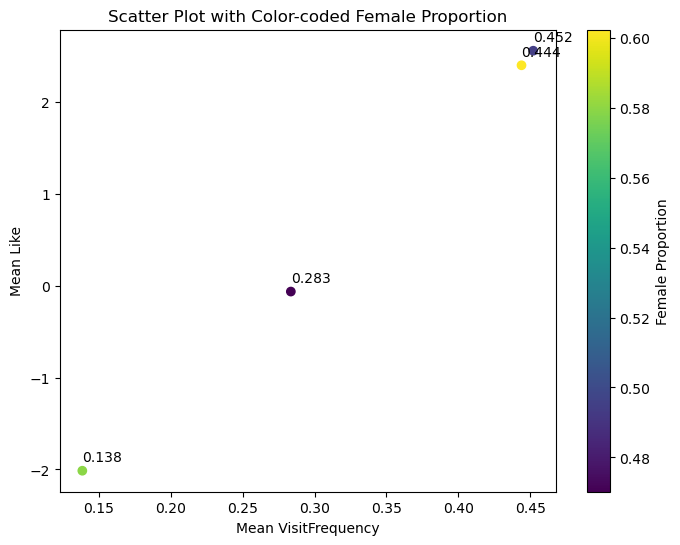

In [33]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

Code calculates means of attributes like "VisitFrequency," "Like," and the proportion of "Female" in each cluster obtained from the previous clustering. It then creates a scatter plot where the x-axis represents the mean "VisitFrequency," the y-axis represents the mean "Like," and the color of the points represents the proportion of "Female" in each cluster. The color scale is defined by the "viridis" colormap. Additionally, text labels are added to the points displaying the corresponding "VisitFrequency" values. This visualization offers insights into how these attributes and the proportion of females are distributed across the clusters.

The observed correlation between 'VisitFrequency' and 'Like' suggests that as the frequency of visits increases, the mean 'Like' rating also tends to increase. This alignment indicates a positive relationship between these two attributes, where customers who visit more frequently also tend to express higher levels of liking.

Furthermore, this graph mentioned that as 'VisitFrequency' increases, the mean proportion of women in the clusters also increases. This suggests a potential relationship between visit frequency and gender distribution within the clusters. It could imply that certain clusters, where customers visit more often, may have a higher representation of female customers.

In summary, the correlation between 'VisitFrequency' and 'Like' underscores a positive connection between visit frequency and customer liking. Additionally, the observation about the relationship between visit frequency and the proportion of women in the clusters highlights a potential pattern in the gender distribution among different clusters based on visit frequency.

<div id="9">

## Conclusion

**Summary Conclusion of Data Analysis: Understanding Customer Preferences and Segmentation**

1. **Data Acquisition and Preprocessing:**
   - The data was obtained from a CSV file using requests and stored as a pandas DataFrame.
   - Initial exploration of the data revealed attributes such as 'yummy,' 'convenient,' 'spicy,' 'fattening,' and more, indicating customers' perceptions of different aspects of McDonald's.

2. **Exploratory Data Analysis (EDA):**
   - Descriptive statistics were computed to understand attribute distributions, means, and variations.
   - Attribute correlations were analyzed to identify potential relationships between attributes.
   - The frequency of attribute values was examined to understand common perceptions.

3. **Data Transformation:**
   - Attributes with binary 'Yes'/'No' values were replaced with 1 and 0, respectively, for further analysis.
   - Data was prepared for clustering by selecting a subset of attributes for analysis.

4. **Principal Component Analysis (PCA):**
   - PCA was applied to reduce dimensionality and capture the most significant variations in the data.
   - The first two principal components were used for visualization, retaining most of the data's variability.

5. **Clustering:**
   - Both K-means clustering and Gaussian Mixture Model (GMM) clustering were performed.
   - Different numbers of clusters were evaluated using metrics like silhouette scores, inertia, and visual analysis.

6. **Comparison of Clustering Results:**
   - A confusion matrix was constructed to compare K-means and GMM cluster assignments.
   - The matrix provided insights into the degree of agreement between the two methods for different cluster assignments.

7. **Visualization and Interpretation:**
   - Visualizations were generated to depict cluster assignments and attribute relationships.
   - Scatter plots showcased the distribution of attributes like 'yummy' and 'convenient' within clusters.

8. **Attribute Relationships and Insights:**
   - A positive correlation was observed between 'VisitFrequency' and 'Like,' indicating that customers who visit more often tend to express higher levels of liking.
   - Additionally, clusters with higher 'VisitFrequency' tended to have a higher proportion of female customers.

**Conclusion:**
The data analysis uncovered valuable insights into customer preferences and segmentation at the McDonald's. Through the application of PCA and clustering techniques, we identified distinct customer clusters based on their perceptions. We observed relationships between attributes, including a positive correlation between visit frequency and liking, which implies that more frequent visitors tend to have more positive sentiments. Moreover, the influence of visit frequency on the proportion of female customers in certain clusters suggests a potential gender-specific preference pattern. The comparison of K-means and GMM clustering provided a comprehensive assessment of the stability of clustering solutions. Overall, this analysis provides actionable insights that McDonald's could utilize to tailor its offerings and services to different customer segments and enhance their dining experience.